In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression 

In [ ]:
import pandas as pd
df = pd.read_parquet("../data/vectors/music_lyrics_vectors.parquet")

NameError: name 'pd' is not defined

In [89]:
df = pd.read_parquet('../data/raw/books_metadata.parquet')
df = df[['rating', 'publish_year']]

In [90]:
regr = LinearRegression() 
subset = df[(df['publish_year'] < 2021) & (df['publish_year'] > 1750) & (df['rating'] > 0)]
X = subset[['publish_year']]
y = subset['rating']
regr.fit(X, y)

LinearRegression()

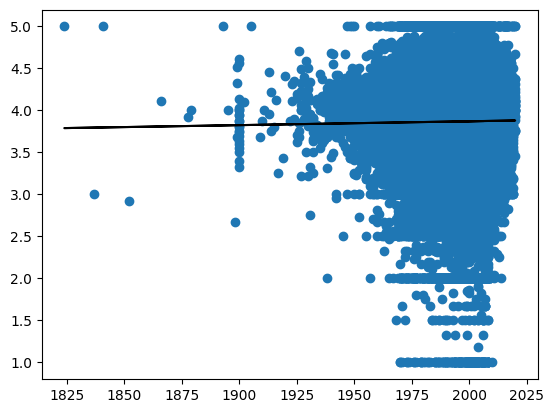

In [91]:
import matplotlib.pyplot as plt 
y_pred = regr.predict(X)
plt.scatter(X, y) 
plt.plot(X, y_pred, color='k')
plt.show()

In [92]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

0.00012188045300665085

In [ ]:
df = pd.read_parquet("../data/raw/music_metadata.parquet")
df = df[['year', 'id']]
counts = df.groupby('year', as_index=False)['id'].count()

In [115]:
counts

,year,id
0,1,1202
1,2,11
2,3,8
3,4,3
4,5,1
...,...,...
593,2023,391
594,2024,24
595,2027,1
596,2057,1


In [ ]:
regr = LinearRegression() 
subset = df[(df['views'] > 0) & (df['year'] > 1850) & (df['year'] < 2022) & (df['views'] > df['views'].quantile(.6))]
X = subset[['year']]
y = subset['views']
regr.fit(X, y)

LinearRegression()

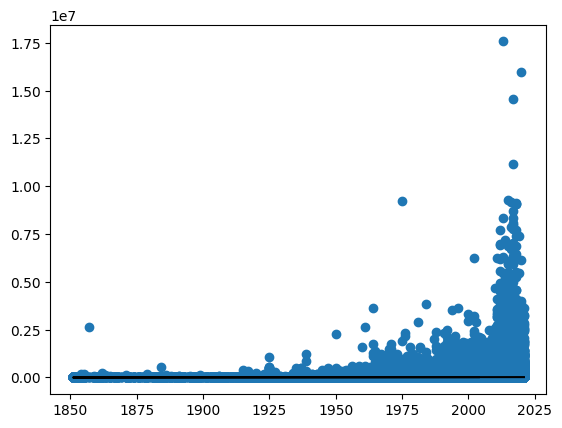

In [95]:
import matplotlib.pyplot as plt 
y_pred = regr.predict(X)
plt.scatter(X, y) 
plt.plot(X, y_pred, color='k')
plt.show()

In [96]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

0.00034853683582924955

In [97]:
regr.coef_

array([116.6870705])

In [98]:
df = pd.read_parquet('../data/raw/movies_metadata.parquet')
df = df[['revenue', 'budget']]
df

,revenue,budget
0,825532764,160000000
1,701729206,165000000
2,1004558444,185000000
3,2923706026,237000000
4,1518815515,220000000
...,...,...
1178356,0,0
1178363,0,0
1178364,0,0
1178366,0,0


In [99]:
regr = LinearRegression() 
subset = df[df['revenue'] > 0]
X = subset[['budget']]
y = subset['revenue']
regr.fit(X, y)

LinearRegression()

In [100]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [13882, 1343613]

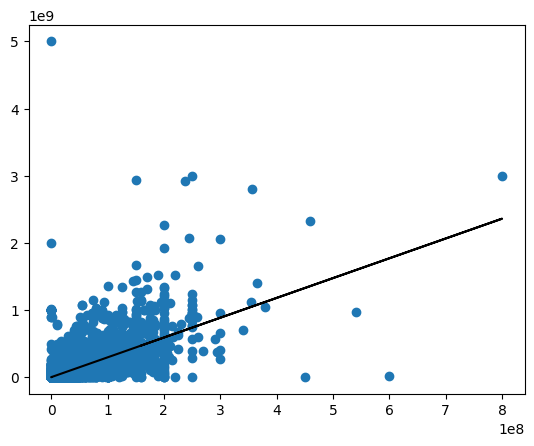

In [ ]:
y_pred = regr.predict(X)
plt.scatter(X, y) 
plt.plot(X, y_pred, color='k')
plt.show()

In [ ]:
regr.coef_

array([2.94842404])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

0.4714993762311722